In [1]:
#importing libraries
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns


#train test split
from sklearn.model_selection import train_test_split

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

#warning hadle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting training dataset
df_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#getting testing dataset
df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
print("Info about train data\n")

df_train.info() 


Info about train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 we can clearly see some null values, present in Item_Weight and Outlet_Size. Now, let's check the test data.

In [7]:
print("Info about test data\n")
df_test.info()

Info about test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


We can see that there are null values for Item_Weight and Outlet_Size in test data also.

In [8]:
#checking the siz of each data set

print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}")

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)


In [9]:
#statistics summary for train data:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
#statistics summary for test data

df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
#missing values in both data set
print("Train:\n")
print(df_train.isnull().sum(),"\n\n",df_train.isnull().sum()/df_train.shape[0] *100,"\n\n")
print("Test:\n")
print(df_test.isnull().sum(),"\n\n",df_test.isnull().sum()/df_test.shape[0] *100,"\n\n")

Train:

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Item_Identifier                 0
Item_Weight                   976
Item_Fa

We can see the % of each missing Values per columns is almost identical!
For Item_Weight ---> 17%,   
for Outlet_Size ---> 28%



 Let's check thebvalue count for Item_Weight and Outlet_Size

In [12]:
#for train data:
print("Item_Weight:\n", df_train.Item_Weight.value_counts(), "\n\n")

print("Outlet_Size:\n", df_train.Outlet_Size.value_counts(), "\n\n")

Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 


Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 




Outlet_Size is a categorical column, therefore we will impute missing values with Medium the mode value

In [13]:
print("test mode, train mode\n",[df_train['Outlet_Size'].mode().values[0], df_test['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [14]:
#train
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].dropna().mode().values[0])

#test
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
df_train['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum()


(0, 0)

Item_weight is a numerical column therefore we need to visualize it's distribution for a clearer display I will use the boxplot in seaborn:



Text(0.5, 1.0, 'Item_Weight Boxplot')

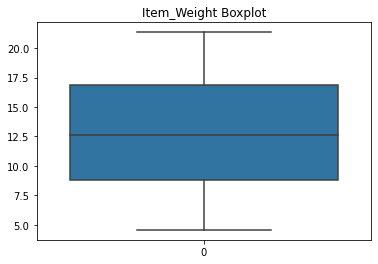

In [16]:
sns.boxplot(data=df_train['Item_Weight'],orient="v")
plt.title("Item_Weight Boxplot")

There are no outliers so we will fill the missing data with the mean value for maximum efficiency.

In [17]:
#train
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].dropna().mean())

#test
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].dropna().mean())

#checking if we filled missing values
df_train['Item_Weight'].isnull().sum(),df_test['Item_Weight'].isnull().sum()


(0, 0)

In [18]:
# Now we can see using the .info() method we can see we have filled succesfully all mising the missing data for both sets:

print("train:\n")
print(df_train.info())
print("\n\ntest:\n")
print(df_test.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

# EDA

Before moving ahead, let's distribute our numerical data and categorical data separately.

In [19]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We can see that, Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type are categorical data.

while Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales are numerical type/continuous type.

Let's make two separate data frame for this two category.

In [29]:
df_cat= df_train[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                  'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

df_num=df_train[[ 'Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales' ]]

print(df_cat.shape)
print("categorical data:\n ")
df_cat.head()




(8523, 7)
categorical data:
 


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [31]:
print(df_num.shape)
print("\nContinuous data :\n")     #display and count for each category

df_num.head()


(8523, 5)

Continuous data :



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [32]:
[df_train[category].value_counts() for category in df_cat[1:]]


[FDW13    10
 FDG33    10
 NCY18     9
 FDD38     9
 DRE49     9
          ..
 FDY43     1
 FDQ60     1
 FDO33     1
 DRF48     1
 FDC23     1
 Name: Item_Identifier, Length: 1559, dtype: int64,
 Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Na

We can See we have Repeating values with different names in the Item_Fat_Content column, we will correct them using the using the .replace() method

In [33]:
#train
df_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat','Low Fat','Regular'],inplace = True)
#test
df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)

#check result
df_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
df_train.head()   #looking at data once again

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052




Outlet_Establishment_Year is quite useless as it is, making a new column with the age the new name will be Outlet_Age

In [35]:
#creating our new column for both datasets
df_train['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda year: 2022 - year)
df_test['Outlet_Age']= df_test['Outlet_Establishment_Year'].apply(lambda year: 2022 - year)

In [36]:
df_train['Outlet_Age'].head()  #checking the Outlet_Age column for train data

0    23
1    13
2    23
3    24
4    35
Name: Outlet_Age, dtype: int64

In [37]:
df_test['Outlet_Age'].head()  #checking Outlet_Age column for test data

0    23
1    15
2    24
3    15
4    37
Name: Outlet_Age, dtype: int64

# Data Visualization

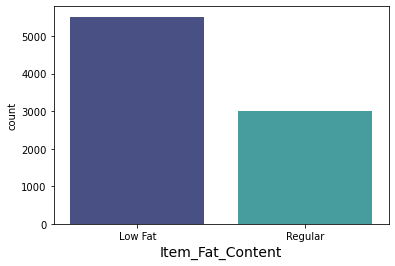

In [39]:
#Univariant analysis
#Let's make boxplot for categoirical data. 
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=df_train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()


We can observe that most Item sold are of Low Fat.

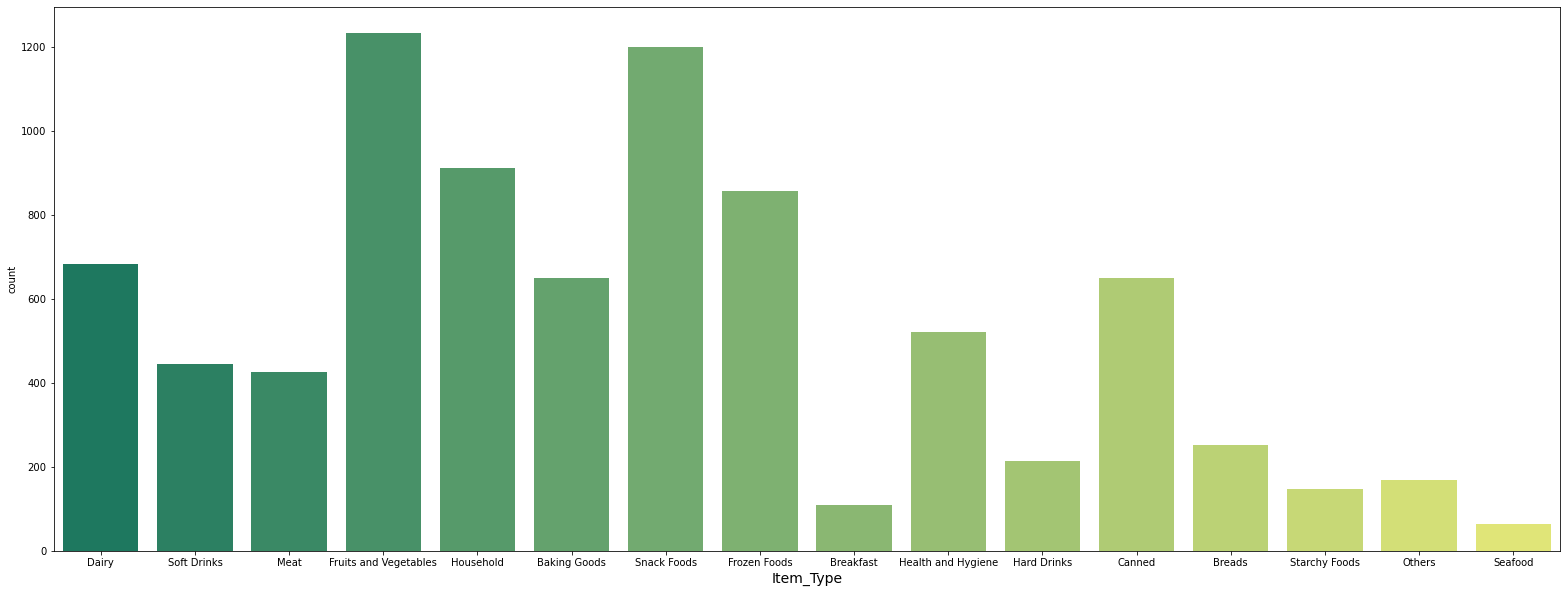

In [41]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=df_train ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

We can observe that Item types that are distictly popular are fruits and vegetables and snack foods.

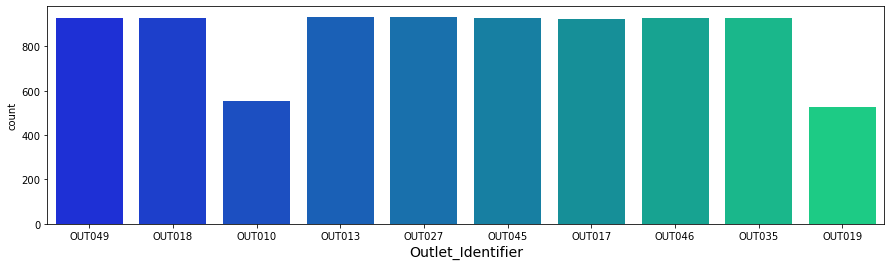

In [42]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=df_train ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

We can observe that Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.

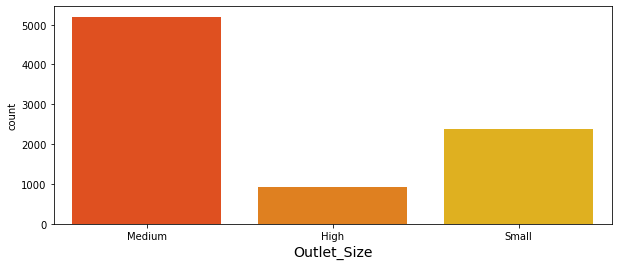

In [43]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=df_train ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

We can observe that Bigmart outlets are mostly medium sized in our data.

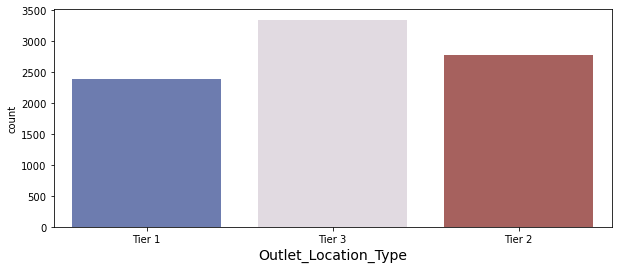

In [44]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=df_train ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

We can observe that the most common type is Tier3.

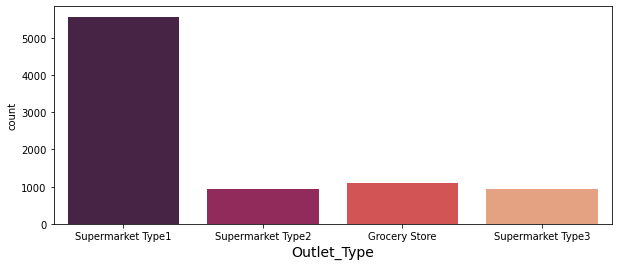

In [45]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=df_train ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()


We can observe that by a wide margin the mode outlet type is Supermarket Type1.

In [49]:
# Now for Continuous Columns
num= df_num.columns

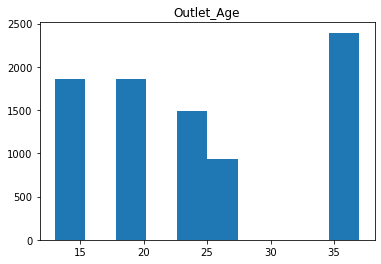

In [47]:
# We can use Outlet_Age in place of Outlet_Establishment_Year for Visualization.

plt.hist(df_train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()



We can observe that most columnn Outlet age is 35 years.  

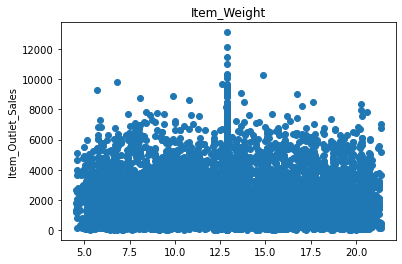

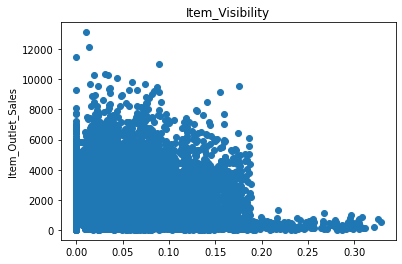

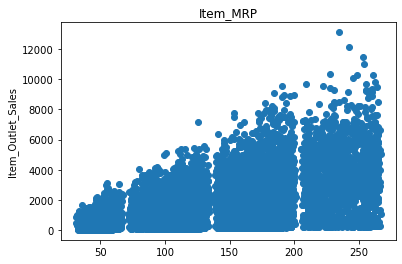

In [50]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for i in df_num[num[:3]]:
    plt.scatter(df_num[i], df_num['Item_Outlet_Sales'])
    plt.title(i)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

We can observe that in Item_Weight - The data is very spreaded, no specific pattern.
In Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
And in Item_MRP - Items with higher MRP tend to sell better in most cases.

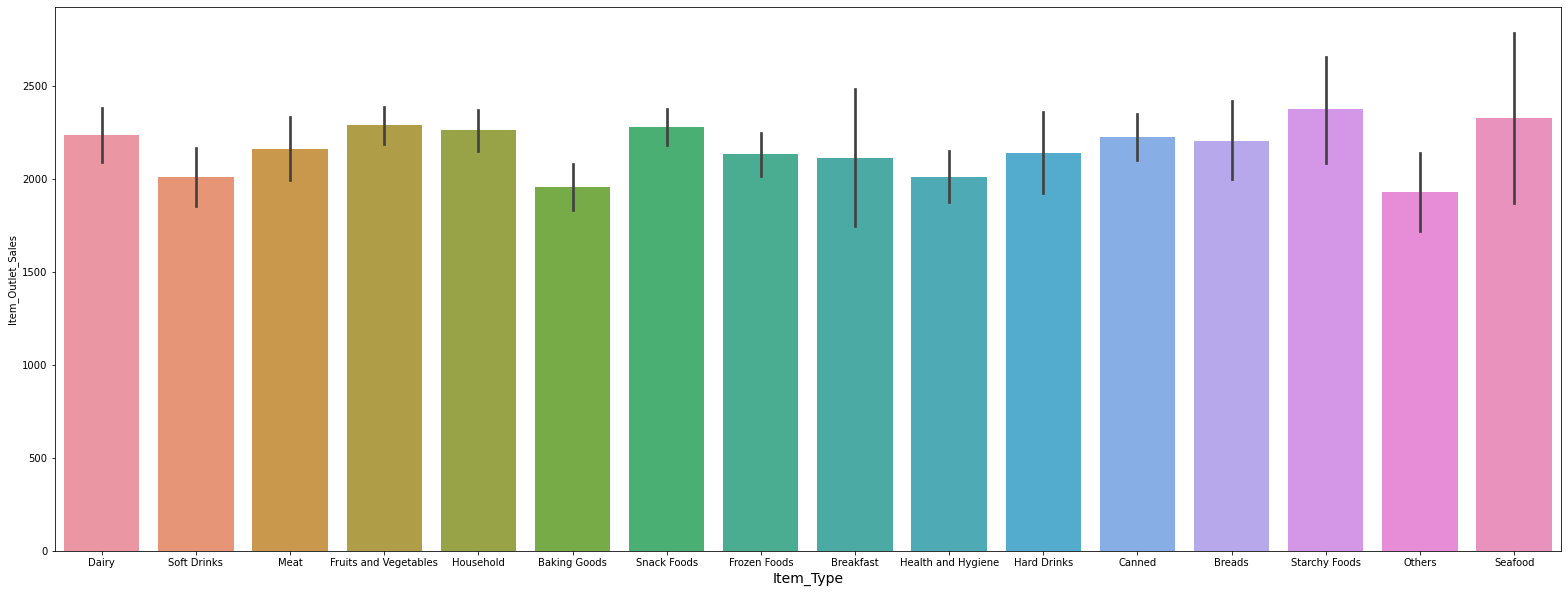

In [52]:
# Multivariant Analysis 
#let's check sales per Item_Type, Outlet, Outlet_type, Outlet_Size, Location type relationships with Item_Outlet_Sales:

plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=df_train)
plt.xlabel('Item_Type', fontsize=14)
plt.show()

The difference in item types by sales is very small.

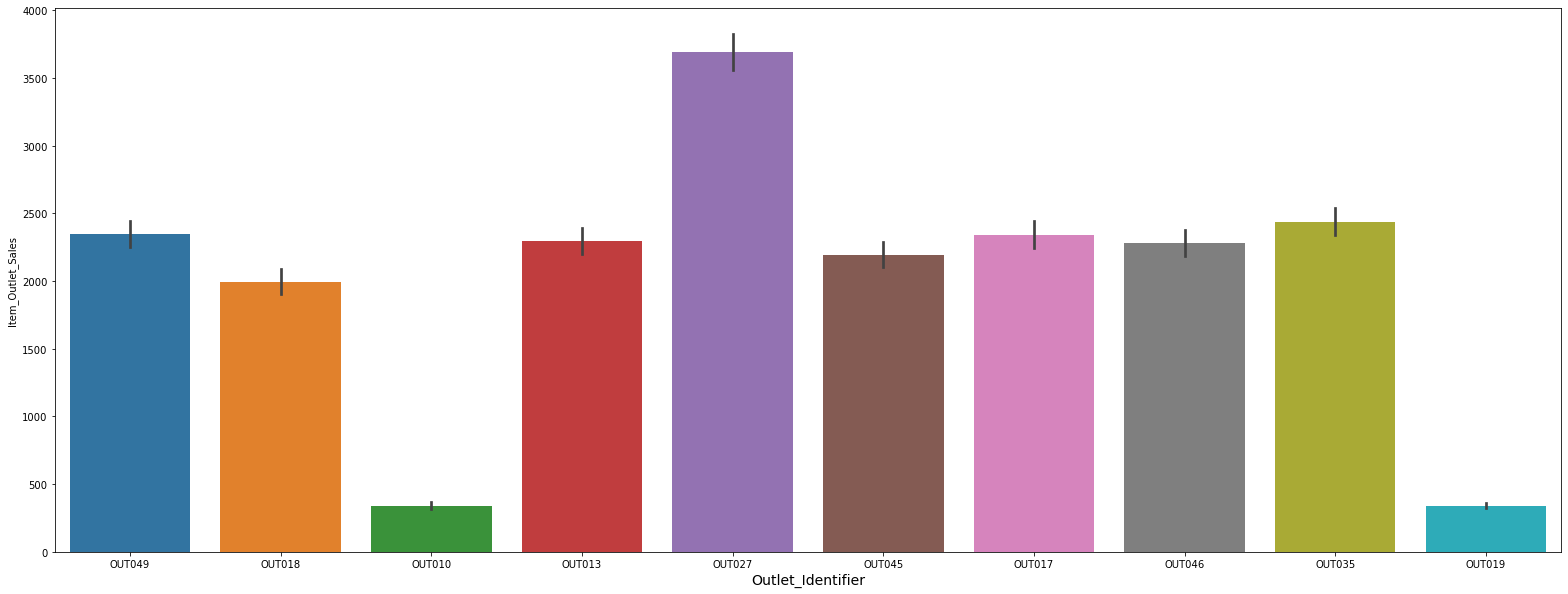

In [54]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=df_train)
plt.xlabel('Outlet_Identifier', fontsize=14)

plt.show()

Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.

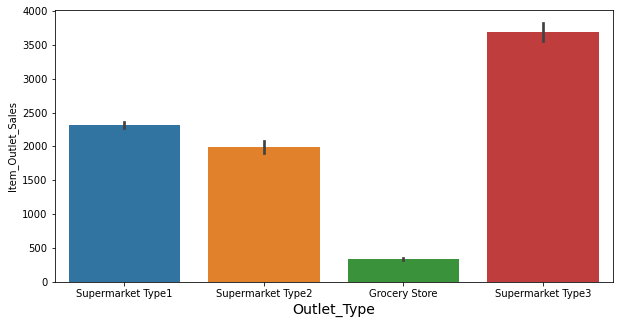

In [55]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=df_train )
plt.xlabel('Outlet_Type', fontsize=14)

plt.show()

Suprisingly supermarket type 3 is the most profitable and not type 1.

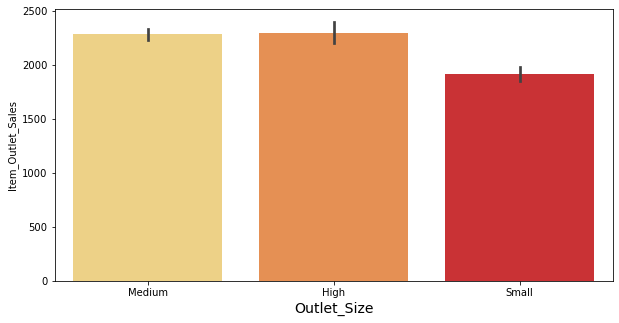

In [57]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=df_train ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)

plt.show()

Medium and high outlet sizes are pretty much even in sales.

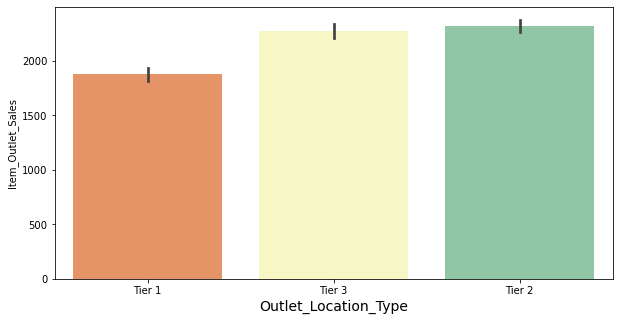

In [59]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=df_train ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)

plt.show()

Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

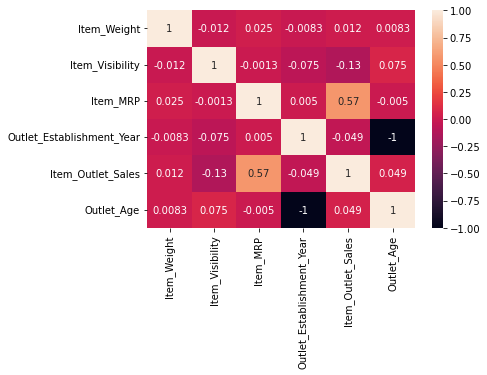

In [60]:
# Correlation Matrix

#plotting the correlation matrix
sns.heatmap(df_train.corr() ,annot=True)
plt.show()

 We can observe that Item_MRP is highly correlated with Item_Outlet_Sales.

In [118]:
df_num.shape

(8523, 5)

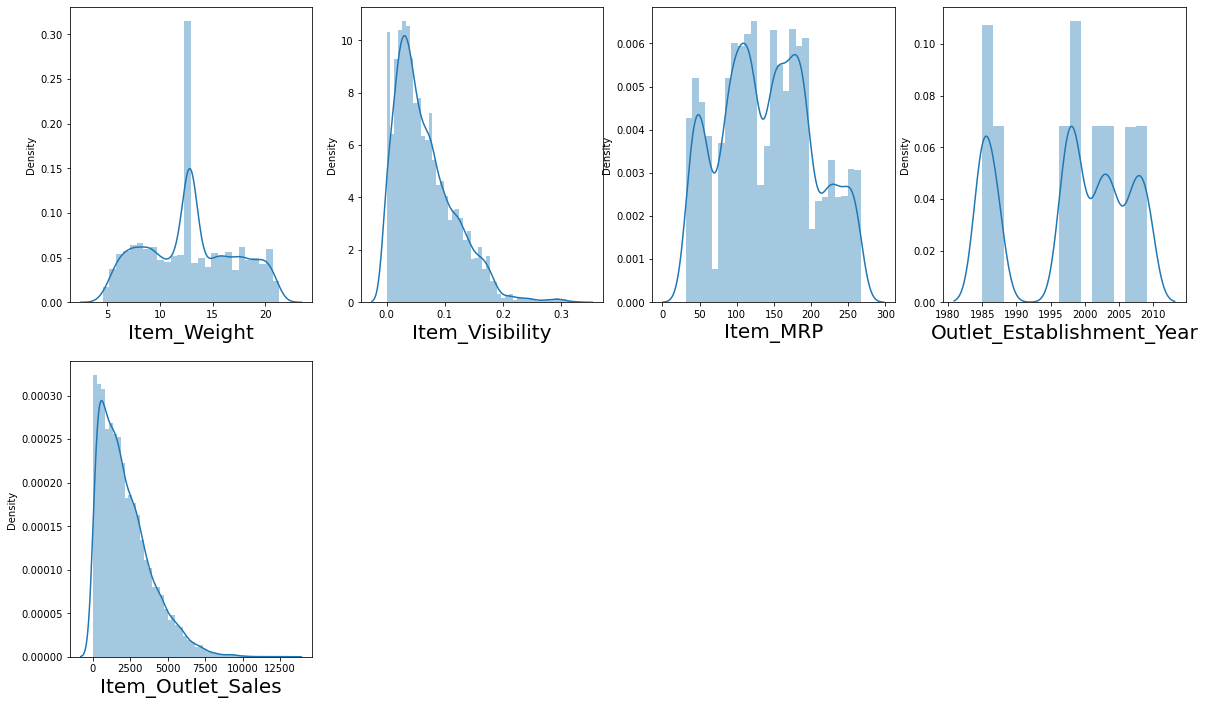

In [120]:
#Let's see how data is distributed for every column

plt.figure(figsize=(20,25))
plotnumber=1

for column in df_num:
    if plotnumber<=5:                           #as there are 5 column in the dataset
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_num[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

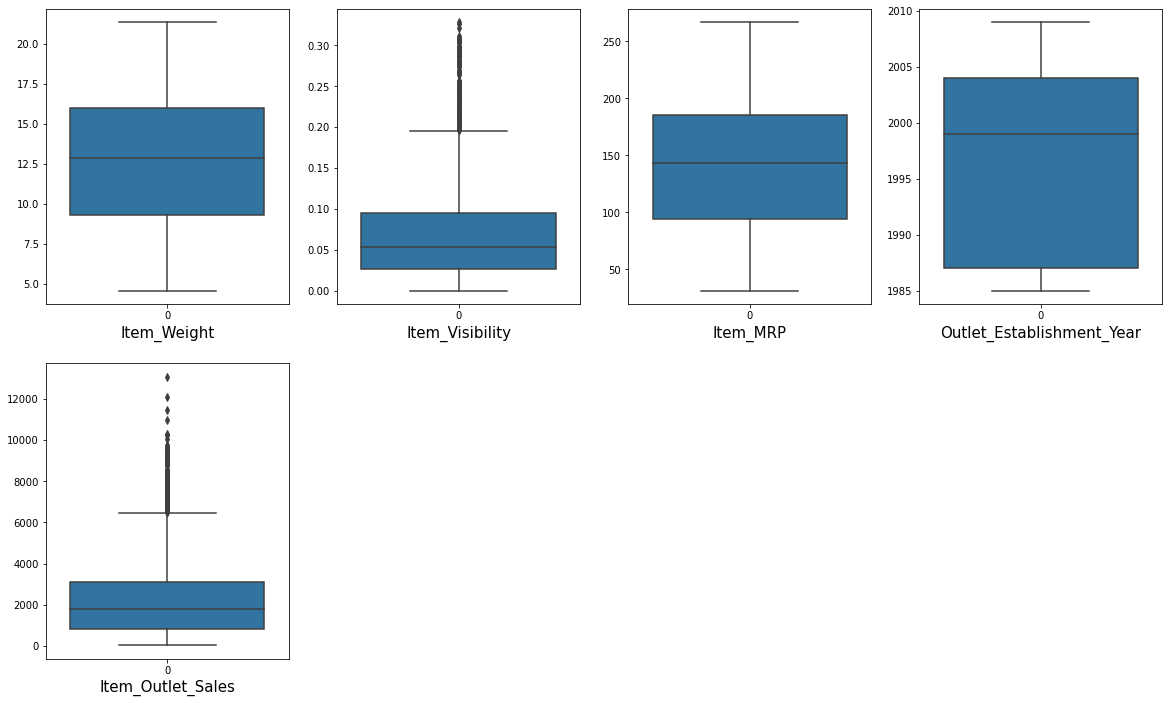

In [121]:
#Visualize the outliers using boxplot (Outlier cannot applied to categorical data, this technique can be done only in continuous data)

plt.figure(figsize=(20,25))
graph=1

for column in df_num:
    if graph<=5:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=df_num[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

Item_Visibility has some outliers , Item_Outlet_Sales is our traget varibale so we will not distrub that.

In [122]:
# Find the IQR (inter quantile range) to identify outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor
#1st quantile
q1= df_train.quantile(0.25)

#3rd quantile
q3= df_train.quantile(0.75)

#IQR
iqr=q3- q1


In [139]:
#validating one outlier
itm_visi_high=(q3.Item_Visibility + (1.5 * iqr.Item_Visibility))
itm_visi_high

0.195979015

In [140]:
#check the indexes which have higher values
index= np.where(df_train['Item_Visibility'] > itm_visi_high)
index

(array([ 330,  672,  956, 1214, 1732, 1916, 2056, 2150, 2371, 2373, 2964,
        3133, 3297, 3302, 3764, 4125, 4142, 4299, 4512, 4995, 5021, 5091,
        5290, 5302, 5380, 5569, 5717, 6028, 6471, 6569, 6592, 6753, 6828,
        6845, 6872, 6885, 6948, 6990, 6999, 7280, 7547, 8194, 8272, 8409],
       dtype=int64),)

In [141]:
# Drop the index which we found in the above cell
df_train= df_train.drop(df_train.index[index])
df_train.shape

(8379, 13)

In [142]:
df_train.reset_index()       # reseting the index

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,23
1,1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,13
2,2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,23
3,3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,24
4,4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,Supermarket Type1,2778.3834,35
8375,8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,Supermarket Type1,549.2850,20
8376,8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,Supermarket Type1,1193.1136,18
8377,8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,Supermarket Type2,1845.5976,13


In [143]:
df_train.skew()

Item_Weight                  0.089860
Item_Fat_Content             0.621204
Item_Visibility              0.738153
Item_MRP                     0.129015
Outlet_Establishment_Year   -0.414811
Outlet_Size                 -0.081516
Outlet_Location_Type        -0.214017
Item_Outlet_Sales            1.170947
Outlet_Age                   0.414811
dtype: float64

Maintaining the threshold for skewness as +/-0.5 we can still see skewness in Item_Visibility and Item_Fat_Content.
We can not distrub Item_Outlet_Sales as it is our target varibale. To remove skewness we will perform zscore on both the columns.

In [144]:
# Z-Score Method

from scipy import stats
df_outlier= df_train[['Item_Visibility', 'Item_Fat_Content']]
z = np.abs(stats.zscore(df_outlier))
print(z)

      Item_Visibility  Item_Fat_Content
0            1.019235          0.736563
1            0.949190          1.357656
2            1.003782          0.736563
3            1.367130          1.357656
4            1.367130          0.736563
...               ...               ...
8518         0.136101          0.736563
8519         0.348580          1.357656
8520         0.604313          0.736563
8521         1.781165          1.357656
8522         0.394197          0.736563

[8379 rows x 2 columns]


In [147]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


We can see that there is no skewness present in the data. So its safe to move as it is

In [150]:
#checking the shape of train data
df_train.shape

(8379, 13)

In [198]:
#since test data set is only used for prediction, so we will not check for skewness and outlier in that set.

# Feature Engineering

We have 7 categorical Columns, which we either need to delete or encode. 

Ordinal variables are: Item_Fat_Content, Outlet_Size, Outlet_Location_Type

Nominal Variables are: Item_Identifier, Item_Type, Outlet_Identifier, Outlet_Type

Continuous variable Outlet_Establishment Year is no longer needed, as we already calculated the Outlet_Age out of it.

In summarizing we can preprocess data as follows -->

The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier don't have significant values so we will drop them.
All Ordinal variables will be Label encoded.
The columns Outlet_Type and Item_Type will be One Hot encoded.


In [151]:
df_cat.apply(lambda x: x.nunique()) #checking the number of unique values in each column

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [152]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])

df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,23
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,13
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,23
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,24
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,35


In [153]:
#one hot encoding

# Apply one-hot encoder
#OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#OHE = OneHotEncoder()
#train_oh = pd.DataFrame(OHE.fit_transform(df_train[['Item_Type','Outlet_Type']]))
#test_oh = pd.DataFrame(OHE.fit_transform(df_test[['Item_Type','Outlet_Type']]))


train_dt= pd.get_dummies(df_train[['Item_Type','Outlet_Type']])  
test_dt=pd.get_dummies(df_test[['Item_Type','Outlet_Type']])
train_dt.head()
#get feature columns
#train_oh.columns = OHE.get_feature_names(cols)
#test_oh.columns = OHE.get_feature_names(cols)

# One-hot encoding removed index; put it back
#train_oh.index = df_train.index
#test_oh.index = df_test.index

# Add one-hot encoded columns to our main df new name: tr_new, te_new (means feature engeenired) 
#tr_new = pd.concat([df_train, train_oh], axis=1)
#te_new = pd.concat([df_test, test_oh], axis=1)


,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [154]:
# Add get dummies columns to our main df new name: tr_new, te_new (means feature engeenired) 
tr_new = pd.concat([df_train, train_dt], axis=1)
te_new = pd.concat([df_test, test_dt], axis=1)


In [155]:
# Dropping irrelevant columns

tr_new  = tr_new.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_new = te_new.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [156]:
tr_new.head()   #checking the data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,23,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,13,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,23,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,24,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,35,0,0,...,0,0,0,0,0,0,0,1,0,0


In [157]:
tr_new.shape   #checking the shape

(8379, 28)

In [158]:
tr_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8379 non-null   float64
 1   Item_Fat_Content                 8379 non-null   int64  
 2   Item_Visibility                  8379 non-null   float64
 3   Item_MRP                         8379 non-null   float64
 4   Outlet_Size                      8379 non-null   int64  
 5   Outlet_Location_Type             8379 non-null   int64  
 6   Item_Outlet_Sales                8379 non-null   float64
 7   Outlet_Age                       8379 non-null   int64  
 8   Item_Type_Baking Goods           8379 non-null   uint8  
 9   Item_Type_Breads                 8379 non-null   uint8  
 10  Item_Type_Breakfast              8379 non-null   uint8  
 11  Item_Type_Canned                 8379 non-null   uint8  
 12  Item_Type_Dairy     

In [159]:
tr_new.shape

(8379, 28)

# Model Building

In [160]:
#splitting data into Label'y' and Features'X'

X = tr_new.drop('Item_Outlet_Sales', axis = 1)
y = tr_new['Item_Outlet_Sales']

#train test split (Hold out method)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [161]:
# defining class for cross validation

def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [173]:
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


Linear Regression Model

In [164]:
#model
LR = LinearRegression(normalize=True)

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 817.63

 Mean Squared Error: 1220449.58

 R^2 Score: 0.5607

LinearRegression(normalize=True) Scores:
0.57
0.54
0.54
0.56
0.56
Average LinearRegression(normalize=True) score: 0.5531


Random Forest Regressor

In [165]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 753.32

 Mean Squared Error: 1144773.38

 R^2 Score: 0.5879

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.56
0.52
0.51
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5398


Lasso Regressor

In [166]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 817.51

 Mean Squared Error: 1220243.54

 R^2 Score: 0.5608

Lasso(alpha=0.05) Scores:
0.57
0.54
0.54
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5532


AdaBoost Model Training

In [167]:
from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor()

In [168]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [175]:
#Model prediction on train data
y_pred= ada.predict(X_test)

In [176]:
#from sklearn.metrics import r2_score 
#accuracy= r2_score(y_train,y_pred)
#print("R_square score : ", accuracy)

ada_MAE = round(MAE(y_test, y_pred),2)
ada_MSE = round(MSE(y_test, y_pred),2)
ada_R_2 = round(R2(y_test, y_pred),4)
ada_CS = round(CVS(ada, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {ada_MAE}\n")
print(f" Mean Squared Error: {ada_MSE}\n")
print(f" R^2 Score: {ada_R_2}\n")
cross_val(ada,AdaBoostRegressor(),X,y,5)

 Mean Absolute Error: 927.31

 Mean Squared Error: 1410792.64

 R^2 Score: 0.4922

AdaBoostRegressor() Scores:
0.42
0.47
0.37
0.47
0.53
Average AdaBoostRegressor() score: 0.4518


# hyper parameter tuning using RandomizedsearchCV

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
params= {'n_estimators' :[47,50,60,70], 'learning_rate': [0.25, 0.30, 0.40]}

In [107]:
rnd_srch= RandomizedSearchCV(AdaBoostRegressor(),cv=5, param_distributions=params)

In [108]:
rnd_srch.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [109]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=47)

In [111]:
ada=AdaBoostRegressor(learning_rate=0.25, n_estimators=47)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print("Accuracy post tuning\n")
print(r2_score(y_test,y_pred))

Accuracy post tuning

0.5514462075290085


In [178]:
# Summarizing each model

MAE= [LR_MAE,RFR_MAE,LS_MAE,ada_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE,ada_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2,ada_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS,ada_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","AdaBoostRegressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
1,Random Forest Regressor,753.32,1144773.38,0.5879,0.5832
2,Lasso Regressor,817.51,1220243.54,0.5608,0.5532
0,Linear Regression,817.63,1220449.58,0.5607,0.5531
3,AdaBoostRegressor,927.31,1410792.64,0.4922,0.4617


We can see that Random Forest regressor gives the best value for output. so lets do hyper parameter tuning for random forest regressor

In [190]:
#Hyper parameter tuning

rfr=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#determining what algorithm and parameter works better.
param_grid = {'n_estimators' : [10,40,80,100],
             'criterion': ['squared_error','absolute_error', 'poisson'],
             'max_depth': [1,2,4],
             'min_samples_split': [2,4],
             'min_samples_leaf' : [2,4,5]}

In [191]:
#gridsearch=GridSearchCV(estimator=rfr, param_grid=param_grid,cv=5)
rnd_srch= RandomizedSearchCV(RandomForestRegressor(),cv=5, param_distributions=param_grid)

In [192]:
#gridsearch.fit(X_train,y_train)

rnd_srch.fit(X_train, y_train)
print("model fitting completed")

model fitting completed


In [193]:
#gridsearch.best_params_
rnd_srch.best_estimator_

RandomForestRegressor(max_depth=2, min_samples_leaf=2)

In [195]:
#we will use the best parameters in our RandomForest algorithm and check if accuracy is increasing .
rfr=RandomForestRegressor(max_depth=2, min_samples_leaf=2) 
rfr.fit(X_train,y_train)
#gridsearch.best_estimator_
#GCV_pred=gridsearch.best_estimator_.predict(X_test)  # predicting with best parameters
y_pred= rfr.predict(X_test)  #predicting for best parameters
print("Accuracy post tuning\n")
print(r2_score(y_test,y_pred))



Accuracy post tuning

0.44016531229749234


# saving the model

In [199]:
# saving best performing model and saving the model to disk
import pickle
filename= "Big_data_mart_sales.sav"
pickle.dump(RFR, open(filename, 'wb'))

# Predicting test data using above model

In [200]:
#load the model from disk.
loaded_model= pickle.load(open(filename,'rb'))

result= loaded_model.predict(te_new)

In [201]:
result

array([1589.00158251, 1430.61716214,  528.0038769 , ..., 1981.11628599,
       3708.14048715, 1367.13954927])